# Python script for plotting

In [1]:
from matplotlib import pyplot as plt
from matplotlib import cycler
from matplotlib import cm
import pandas as pd
from astropy.io import ascii
import numpy as np

## read the data

In [21]:
path = "E:/UC Davis/Research/Synthetic Dimensions/Synthetic_dim_code/"
filename = "Temp_E_newM_nonperiodic_J10.0_0.25_Q16_sweep1000000.txt"
df=ascii.read(path + filename)

In [3]:
#df['col1']

In [22]:
colnames = [0.0,0.05,	0.1,	0.15,	0.2,	0.25,	0.3,	0.35,	0.4,	0.45,	0.5,	0.55,	0.6,	0.65,	0.7,	0.75,	0.8,	0.85,	0.9,	0.95,	1.0,	1.05,	1.1,	1.15]

## make a plot

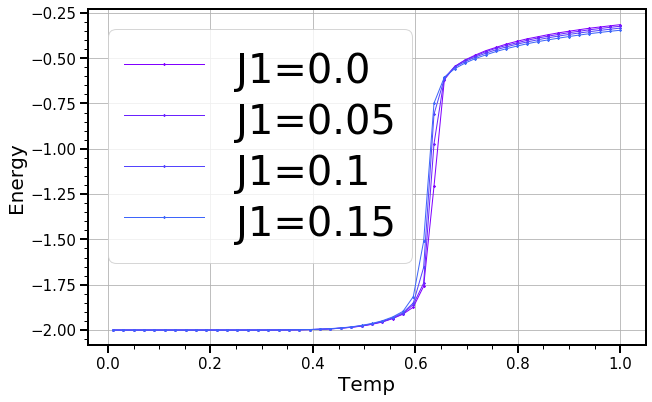

In [23]:
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)
plt.rcParams['axes.prop_cycle'] = custom_cycler
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
params = {'legend.fontsize': 13,
         'axes.labelsize': 15,
         'axes.titlesize':20,
         'xtick.labelsize':12,
         'ytick.labelsize':12,
         'ytick.major.size': 5.5,
         'axes.linewidth': 2}

plt.rcParams.update(params)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,6.18))

ax = axs
for index, colname in enumerate(colnames[0:4]):
    #ax.plot(df['col'+str(index*2+1)], df['col'+str(index*2+2)], '-*', markersize=2, linewidth=1, 
    #        color = (index*1/24, 1-index*1/24, 1-index*1/24), label=str(colname), alpha=1)
    ax.plot(df['col'+str(index*2+1)], df['col'+str(index*2+2)], '-*', markersize=2, linewidth=1, 
            color = cm.rainbow(index/23.), label='J1='+str(colname), alpha=1)
    #ax.plot(df['col'+str(index*2+1)], df['col'+str(index*2+2)], style_kwargs=custom_cycler[index])

#ax.legend(ncol=3, handleheight=1.5, labelspacing=0.05, loc='upper left', frameon=True, fontsize=12)
ax.legend(handleheight=1.5, labelspacing=0.05, loc='upper left', frameon=True, fontsize=40)
#ax.set_xlim(0, 1)
#ax.set_ylim(60, 80)
ax.set_xlabel(r'Temp', size=20)
ax.set_ylabel(r'Energy', size=20)
ax.minorticks_on()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15, length = 8, width = 2)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12, length = 4, width = 1)
ax.grid(True)


fig.savefig('./paper_plots/'+"Energy_zoomed_"+"L=8_Q=16"+'.png', format='png', dpi=600)

## Exponent vs T plots

In [3]:
path = "E:/UC Davis/Research/Synthetic Dimensions/Synthetic_dim_code/M2_graph_newM_rev/"

mainplot_filename = "exponent_vs_T.txt"
df=ascii.read(path + mainplot_filename)

subplot_filenames = ["Q=16_T=0.01_J1=1.15lnM2_vs_lnN", "Q=16_T=0.39387755102040817_J1=1.15lnM2_vs_lnN", "Q=16_T=0.7777551020408163_J1=1.15lnM2_vs_lnN", "Q=16_T=1.0_J1=1.15lnM2_vs_lnN"]
df_sub = []
for index,filename in enumerate(subplot_filenames):
    df_sub.append(ascii.read(path + filename + ".txt")) 
fitted_params = [[-0.15002821845120723, -0.5547803158270909],[-0.09538168257824194, -0.7628527784498507],[-0.4685088798008197, 0.2669287347595746], [-1.001029336025323, 0.8030982597194458]]

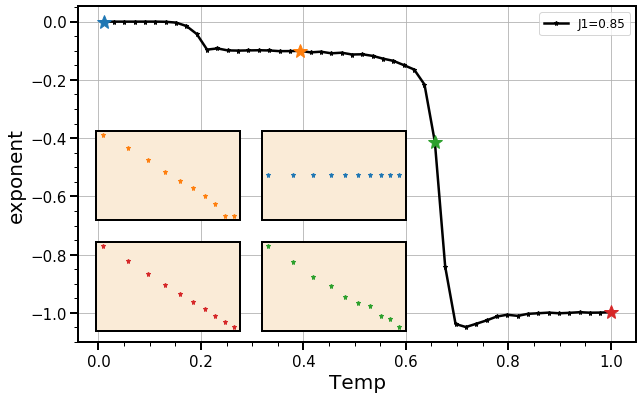

In [47]:
from matplotlib import pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6.18))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
params = {'legend.fontsize': 12,
          'figure.figsize': (15, 5),
         'axes.labelsize': 15,
         'axes.titlesize':20,
         'xtick.labelsize':10,
         'ytick.labelsize':10,
         'ytick.major.size': 5.5,
         'axes.linewidth': 2}
plt.rcParams.update(params)
ax = axs
ax.plot(df["Temp"], df["J1=0.85"], '-*', markersize=5, linewidth=2.5, 
            color = 'k', label = "J1=0.85")
ax.plot(df["Temp"][0], df["J1=0.85"][0], '*', markersize=15, 
            color = colors[0])
ax.plot(df["Temp"][19], df["J1=0.85"][19], '*', markersize=15, 
            color = colors[1])
ax.plot(df["Temp"][32], df["J1=0.85"][32], '*', markersize=15, 
            color = colors[2])
ax.plot(df["Temp"][49], df["J1=0.85"][49], '*', markersize=15, 
            color = colors[3])

# this is an inset axes over the main axes
ax1 = fig.add_axes([.38, .4, .2, .2], facecolor='antiquewhite')
ax1.plot(df_sub[0]["col1"], df_sub[0]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[0])
ax1.set(xticks=[], yticks=[])
# this is another inset axes over the main axes
ax2 = fig.add_axes([.15, .4, .2, .2], facecolor='antiquewhite')
ax2.plot(df_sub[1]["col1"], df_sub[1]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[1])
ax2.set(xticks=[], yticks=[])
ax3 = fig.add_axes([.38, .15, .2, .2], facecolor='antiquewhite')
ax3.plot(df_sub[2]["col1"], df_sub[2]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[2])
ax3.set(xticks=[], yticks=[])
ax4 = fig.add_axes([.15, .15, .2, .2], facecolor='antiquewhite')
ax4.plot(df_sub[3]["col1"], df_sub[3]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[3])
ax4.set(xticks=[], yticks=[])
ax.legend()
#ax.set_xlim(0, 1)
#ax.set_ylim(60, 80)
ax.set_xlabel('Temp', size=20)
ax.set_ylabel('exponent', size=20)
ax.minorticks_on()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15, length = 8, width = 2)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12, length = 4, width = 1)
ax.grid(True)

fig.savefig('Q=16_T=0.01_0.39_0.60_1.0_J1=0.85_lnM2_vs_lnN.png', format='png', dpi=600)

E:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


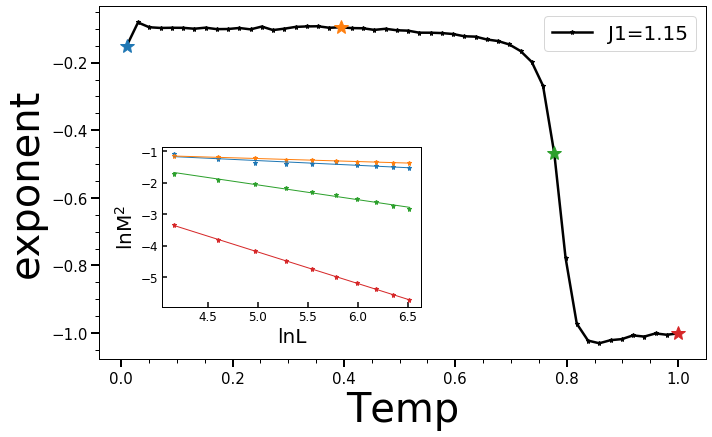

In [20]:
from matplotlib import pyplot as plt
import numpy as np

J1_val = 1.15
J1_colname = 'J1='+str(J1_val)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6.18))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
params = {'legend.fontsize': 20,
          'figure.figsize': (15, 5),
         'axes.labelsize': 15,
         'axes.titlesize':20,
         'xtick.labelsize':10,
         'ytick.labelsize':10,
         'ytick.major.size': 5.5,
         'axes.linewidth': 1}
plt.rcParams.update(params)
ax = axs
ax.plot(df["Temp"], df[J1_colname], '-*', markersize=5, linewidth=2.5, 
            color = 'k', label = J1_colname)
ax.plot(df["Temp"][0], df[J1_colname][0], '*', markersize=15, 
            color = colors[0])
ax.plot(df["Temp"][19], df[J1_colname][19], '*', markersize=15, 
            color = colors[1])
ax.plot(df["Temp"][38], df[J1_colname][38], '*', markersize=15, 
            color = colors[2])
ax.plot(df["Temp"][49], df[J1_colname][49], '*', markersize=15, 
            color = colors[3])

# this is an inset axes over the main axes
ax1 = fig.add_axes([.23, .30, .36, .36], facecolor='white')
ax1.plot(df_sub[0]["col1"], df_sub[0]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[0])
ax1.plot(df_sub[1]["col1"], df_sub[1]["col2"], '*', markersize=5, linewidth=1, 
           color = colors[1])
ax1.plot(df_sub[2]["col1"], df_sub[2]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[2])
ax1.plot(df_sub[3]["col1"], df_sub[3]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[3])
lnL = np.linspace(min(df_sub[0]["col1"]), max(df_sub[0]["col1"]), 10)
for index, value in enumerate(fitted_params):
    ax1.plot(lnL, lnL*value[0]+value[1], linewidth=1, 
            color = colors[index])

ax1.tick_params(axis = 'both', which = 'major', direction="in", labelsize = 12, length = 5, width = 1.5)
ax1.set_xlabel('lnL', size=20)
ax1.set_ylabel(r'ln$\rm M^2$', size=20)
#ax1.yaxis.set_label_position("right")
#ax1.xaxis.set_label_position("top")
#ax1.yaxis.tick_right()
#ax1.xaxis.tick_top()

ax.legend()
#ax.set_xlim(0, 1)
#ax.set_ylim(60, 80)
ax.set_xlabel('Temp', size=40)
ax.set_ylabel('exponent', size=40)
ax.minorticks_on()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15, length = 8, width = 2)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12, length = 4, width = 1)
ax.grid(False)
#ax.text(.5,-.5,'hello')

fig.tight_layout()

fig.savefig('./paper_plots/Q=16_T=0.01_0.39_0.78_1.0_J1=1.15_lnM2_vs_lnN_alt.png', format='png', dpi=600)

## Making a plot of E,C and Binder over different L

In [2]:
path = "E:/UC Davis/Research/Synthetic Dimensions/Synthetic_dim_code/data_in_text/fine_peak_data/"

filenames = ["fine_peak_nonperiodic_L=8_J1=[0.0]_C","fine_peak_nonperiodic_L=12_J1=[0.0]_C","fine_peak_nonperiodic_L=16_J1=[0.0]_C"]

df_sub = []
for index,filename in enumerate(filenames):
    df_sub.append(ascii.read(path + filename + ".txt"))
#df_sub[1]

colnames = []
num_col = len(df_sub[0].keys())
for index in range(int(num_col/2)):
    colnames.append([df_sub[0].keys()[index*2], df_sub[0].keys()[index*2+1]])

FileNotFoundError: [Errno 2] No such file or directory: 'E:/UC Davis/Research/Synthetic Dimensions/Synthetic_dim_code/data_in_text/fine_peak_data/fine_peak_nonperiodic_L=8_J1=[0.1]_C.txt'

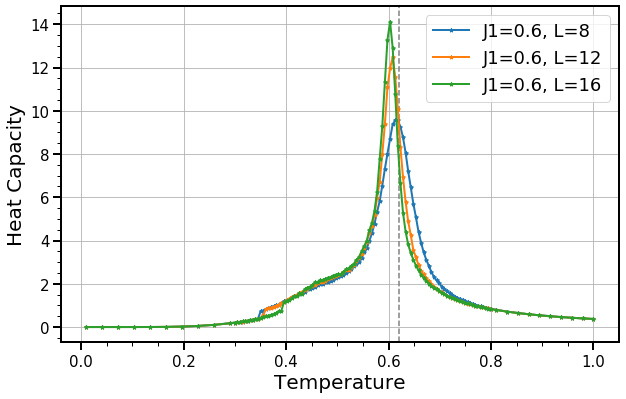

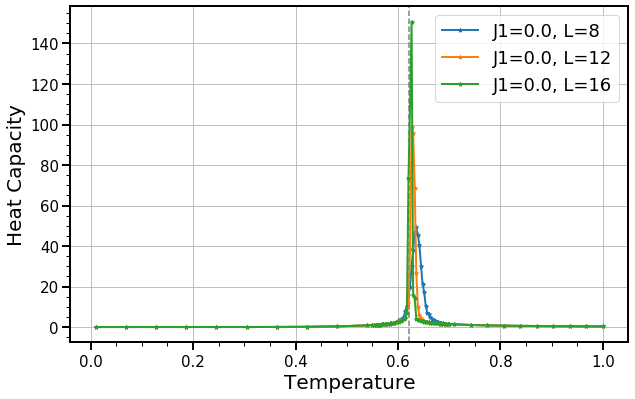

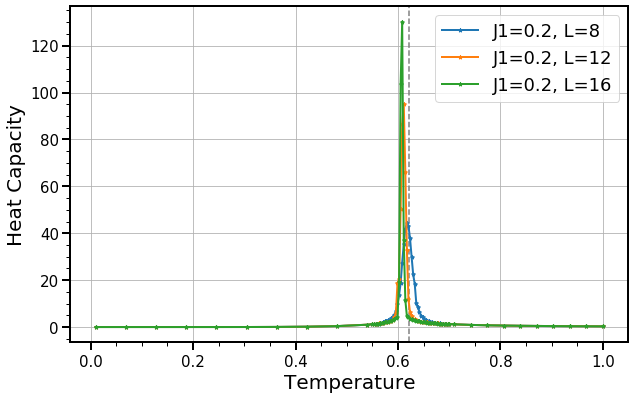

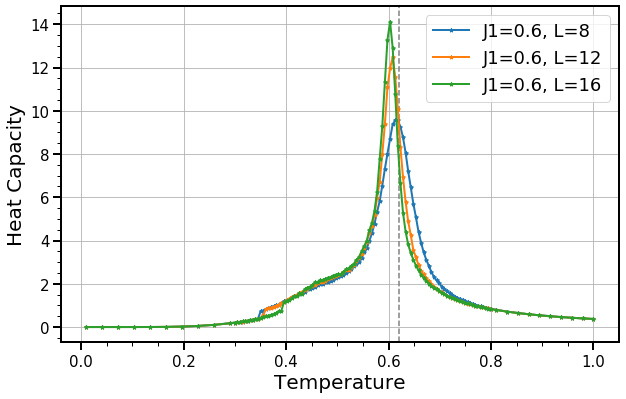

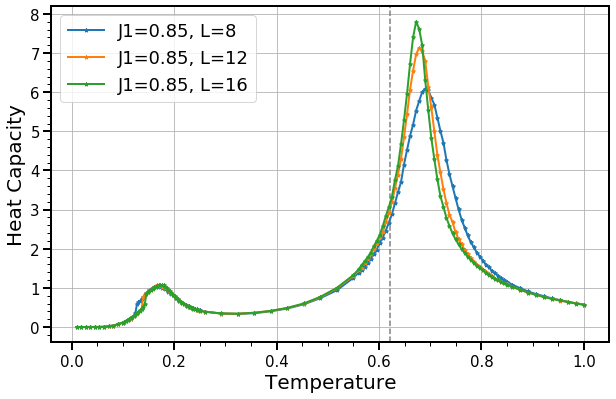

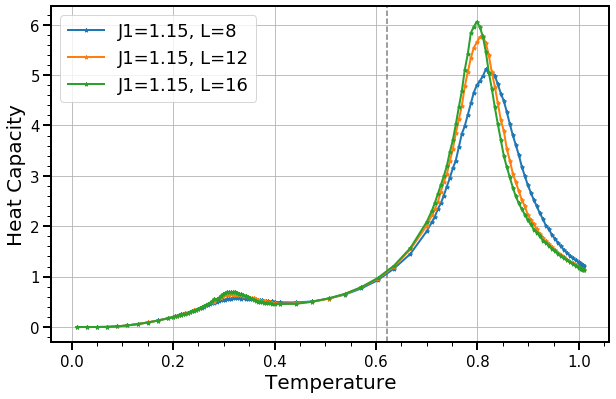

In [2]:
def size_compare_ploting(df_sub, colnames, quantity, quantity_symbol, J1):
    colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
    custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)
    plt.rcParams['axes.prop_cycle'] = custom_cycler
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    #colors = ['lime','blue','red']
    params = {'legend.fontsize': 13,
                     'axes.labelsize': 15,
                     'axes.titlesize':20,
                     'xtick.labelsize':12,
                     'ytick.labelsize':12,
                     'ytick.major.size': 5.5,
                     'axes.linewidth': 2}

    plt.rcParams.update(params)

    Ls = ['8','12','16']
    for J1_index,colname in enumerate(colnames):
        fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,6.18))
        ax = axs
        
        ax.axvline(x=0.6213, color='gray', linestyle='--')
        for L_index, df in enumerate(df_sub):
            label="J1="+colname[0].replace('Temp_','')+', L='+Ls[L_index]
            #label='L='+Ls[L_index]
            ax.plot(df[colnames[J1_index][0]], df[colnames[J1_index][1]], '-*', markersize=4, 
                    linewidth=2, 
                    color = colors[L_index], 
                    label=label, alpha=1)

            #ax.legend(ncol=1, handleheight=1.5, labelspacing=0.05, loc='upper left', frameon=True)
        ax.legend(fontsize=18)
        #ax.set_xlim(0, 1)
        #ax.set_ylim(60, 80)
        ax.set_xlabel(r'Temperature', size=20)
        ax.set_ylabel(quantity, size=20)
        ax.minorticks_on()
        ax.tick_params(axis = 'both', which = 'major', labelsize = 15, length = 8, width = 2)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 12, length = 4, width = 1)
        ax.grid(True)
                
        fig.savefig('./paper_plots/M2added_plots/C/'+'fine_peak_M2added_'
                    +quantity_symbol+"J1="+colname[0].replace('Temp_','')+'.png',
                    format='png', 
                    dpi=600)
        #break
        
 

J1_list = ['0.6','0.0', '0.2', '0.6', '0.85', '1.15','0.1','0.3']
#plotting different
for J1 in J1_list:
    quantity = r"M"
    quantity_symbol = 'C'

    #read in the data
    path = "E:/UC Davis/Research/Synthetic Dimensions/Synthetic_dim_code/data_in_text/fine_peak_data/"
    filenames = ["fine_peak_nonperiodic_L=8_J1=["+J1+"]_"+quantity_symbol,"fine_peak_nonperiodic_L=12_J1=["+J1+"]_"+quantity_symbol,"fine_peak_nonperiodic_L=16_J1=["+J1+"]_"+quantity_symbol]
    df_sub = []
    for index,filename in enumerate(filenames):
        df_sub.append(ascii.read(path + filename + ".txt"))
    #get the column names
    colnames = []
    num_col = len(df_sub[0].keys())
    for index in range(int(num_col/2)):
        colnames.append([df_sub[0].keys()[index*2], df_sub[0].keys()[index*2+1]])
        
    size_compare_ploting(df_sub=df_sub, colnames=colnames, quantity=quantity, quantity_symbol=quantity_symbol, J1=J1)

    

## Plot different $J_1$ values on the same plot

[['Temp_0.6', 'M2_0.6']]
[['Temp_0.6', 'M2_0.6']]
[['Temp_0.6', 'M2_0.6']]


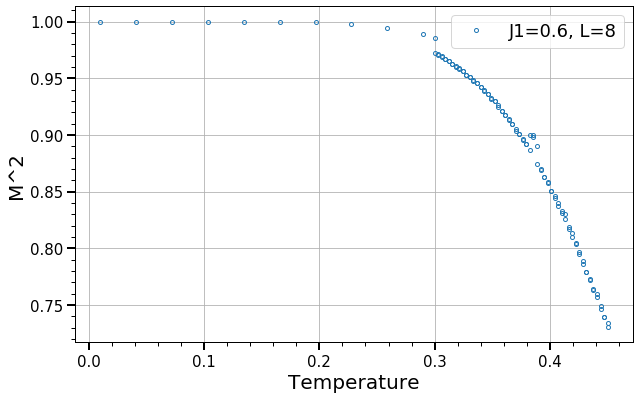

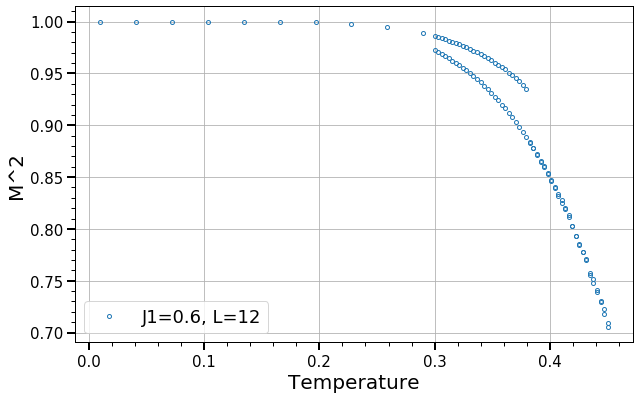

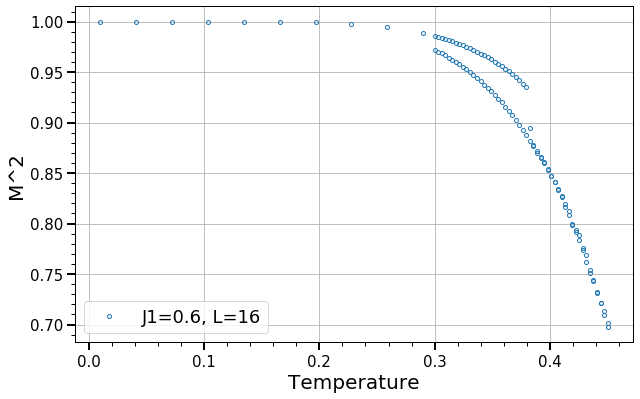

In [7]:
def size_compare_ploting(df_J1s, colnames, quantity, quantity_symbol, J1_list,L):
    colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
    custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)
    plt.rcParams['axes.prop_cycle'] = custom_cycler
    #colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    #colors = ['lime','blue','red']
    params = {'legend.fontsize': 13,
                     'axes.labelsize': 15,
                     'axes.titlesize':20,
                     'xtick.labelsize':12/2,
                     'ytick.labelsize':12/2,
                     'ytick.major.size': 5.5/2,
                     'axes.linewidth': 2/2}

    plt.rcParams.update(params)

    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,6.18))
    ax = axs
    
    #ax.axvline(x=0.6213, color='gray', linestyle='--')
    for J1_index, df in enumerate(df_J1s):
        label="J1="+colnames[J1_index][0].replace('Temp_','')+', L='+L
        #label='L='+Ls[L_index]
        ax.plot(df[colnames[J1_index][0]][0:110], df[colnames[J1_index][1]][0:110], 'o',mfc='none', markersize=4, 
                linewidth=2, 
                color = colors[J1_index], 
                label=label, alpha=1)

            #ax.legend(ncol=1, handleheight=1.5, labelspacing=0.05, loc='upper left', frameon=True)
    ax.legend(fontsize=18)
    #ax.set_xlim(0, 1)
    #ax.set_ylim(60, 80)
    ax.set_xlabel(r'Temperature', size=20)
    ax.set_ylabel(quantity, size=20)
    ax.minorticks_on()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15, length = 8, width = 2)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 12, length = 4, width = 1)
    ax.grid(True)
                
    fig.savefig('./paper_plots/hysteresis/M2/'+'hysteresis_scatter_plots_zoomed_L='+L
                +quantity_symbol+"J1="+str(J1_list)+'.png',
                format='png', 
                dpi=600)
        
 
Ls = ['8','12','16']
J1_list = ['0.6']#['0.0', '0.1', '0.2', 
#plotting different
for L in Ls:
    filenames = []
    for J1 in J1_list:
        quantity = r"M^2"
        quantity_symbol = 'M2'

        #read in the data
        path = "E:/UC Davis/Research/Synthetic Dimensions/Synthetic_dim_code/data_in_text1/hysteresis/"
        filenames.append("fine_peak_M2added_nonperiodic_L="+L+"_J1=["+J1+"]_"+quantity_symbol)
    #get data frames into an array [df_J1_1,df_J1_2,df_J1_3...]
    df_J1s = []
    for index,filename in enumerate(filenames):
        df_J1s.append(ascii.read(path + filename + ".txt"))
    #get the column names: [[tempa_1, J1a_1, tempa_2, J1a_2...],[tempb_1, J1b_1, tempb_2, J1b_2...]...]
    colnames = []
    num_col = len(df_J1s)
    for J1 in range(num_col):
        colnames.append([df_J1s[J1].keys()[0], df_J1s[J1].keys()[1]])
    print(colnames)
    
    size_compare_ploting(df_J1s=df_J1s, colnames=colnames, quantity=quantity, quantity_symbol=quantity_symbol, J1_list=J1_list,L=L)

## Create panel of plots 

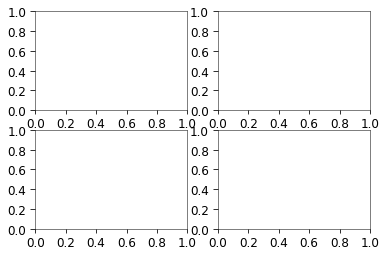

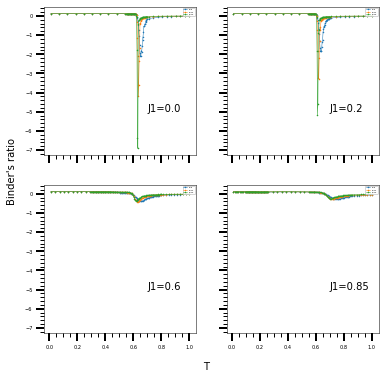

In [4]:
fig, axs = plt.subplots(2, 2)

colnames = []
num_col = len(df_sub[0].keys())
for index in range(int(num_col/2)):
    colnames.append([df_sub[0].keys()[index*2], df_sub[0].keys()[index*2+1]])

def size_compare_ploting(ax, df_sub, colnames, quantity, quantity_symbol, J1):
    '''creates a subplot in a panel of plots'''
    Ls = ['8','12','16']
    for J1_index,colname in enumerate(colnames):
        for L_index, df in enumerate(df_sub):
            label='L='+Ls[L_index]
            ax.plot(df[colnames[J1_index][0]], df[colnames[J1_index][1]], '-*', markersize=1, 
                    linewidth=0.5, 
                    color = colors[L_index], 
                    label=label, alpha=1)

            #ax.legend(ncol=1, handleheight=1.5, labelspacing=0.05, loc='upper left', frameon=True)
        ax.legend(fontsize=2)
        #ax.set_xlim(0, 1)
        #ax.set_ylim(60, 80)
        ax.minorticks_on()
        ax.tick_params(axis = 'both', which = 'major', labelsize = 5, length = 8, width = 2)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 5, length = 4, width = 1)
        ax.grid(False)
        
        ax.text(0.7, -5, 'J1='+str(J1), fontsize='10')

#################################################
        
        #break
#############################################

J1_list = ['0.0', '0.2', '0.6', '0.85']#, '1.15']

colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)
plt.rcParams['axes.prop_cycle'] = custom_cycler
params = {'legend.fontsize': 13,
          'axes.labelsize': 15,
          'axes.titlesize':20,
          'xtick.labelsize':3,
          'ytick.labelsize':3,
          'ytick.major.size': 2,
          'axes.linewidth': 0.5}
plt.rcParams.update(params)
      

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(6, 6))

fig.text(0.5, 0.04, 'T', ha='center')
fig.text(0.04, 0.5, "Binder's ratio", va='center', rotation='vertical')
for J1_index,J1 in enumerate(J1_list):
    quantity = r"Binder's ratio"
    quantity_symbol = 'Binder'

    #read in the data
    path = "E:/UC Davis/Research/Synthetic Dimensions/Synthetic_dim_code/data_in_text/fine_peak_data/"
    filenames = ["fine_peak_nonperiodic_L=8_J1=["+J1+"]_"+quantity_symbol,"fine_peak_nonperiodic_L=12_J1=["+J1+"]_"+quantity_symbol,"fine_peak_nonperiodic_L=16_J1=["+J1+"]_"+quantity_symbol]
    df_sub = []
    for index,filename in enumerate(filenames):
        df_sub.append(ascii.read(path + filename + ".txt"))
    #get the column names
    colnames = []
    num_col = len(df_sub[0].keys())
    for index in range(int(num_col/2)):
        colnames.append([df_sub[0].keys()[index*2], df_sub[0].keys()[index*2+1]])
    #configure the main plot
    
    
    size_compare_ploting(ax=axs[int(np.floor(J1_index/2)),J1_index%2],df_sub=df_sub, colnames=colnames, quantity=quantity, quantity_symbol=quantity_symbol, J1=J1)

    
fig.savefig('./paper_plots/B_plots/'+'fine_peak_panel_B.png', format='png', dpi=600)

In [37]:
int(np.floor(0.5))

0